<a href="https://colab.research.google.com/github/AsraSelen/Statistical-Learning-from-Data-Applications-in-Physics-HW/blob/main/HW1PART2_FIZ437.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
x=np.reshape(np.linspace(0,8,1000),(1000,1))
J0=np.reshape(sp.jv(0,x),(1000,1)) 
target0=np.hstack((x,J0+0.1*np.reshape(np.random.normal(0, 1, 1000),(1000,1))))
xf=target0[:,0]
yf=target0[:,1]
np.random.shuffle(target0)
list=[10,20,100,1000,10000] 

for d in range(len(list)):
 target=target0[:int(list[d]),:]
 validset=(target[:int(0.2*len(target)),:])
 trainset=target[int(0.2*len(target)):int(len(target)),:]
 X=np.reshape(trainset[:,0],(-1,1))
 y=trainset[:,1]
 poly_reg = PolynomialFeatures(degree = 8) 
 X_poly= poly_reg.fit_transform(X) 
 poly_reg.fit(X_poly, y) 
 lin_reg_2 = LinearRegression() 
 lin_reg_2.fit(X_poly,y)
 X_grid = np.arange(min(X), max(X), 0.1) 
 X_grid = X_grid.reshape((len(X_grid), 1)) 
 plt.scatter(X, y, label="training pt",color = 'red') 
 plt.plot(x,J0,'*',label="ground truth",color='yellow')
 y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_grid))
 plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)),label="fit" ,color = 'blue') 
 plt.scatter(validset[:,0],validset[:,1],label="testing pt", color = "green")
 plt.xlabel('x') 
 plt.ylabel('0th Order Bessel Function')   #legend ekle!! true func,predicted func, data scattering
 plt.legend()
 plt.show()

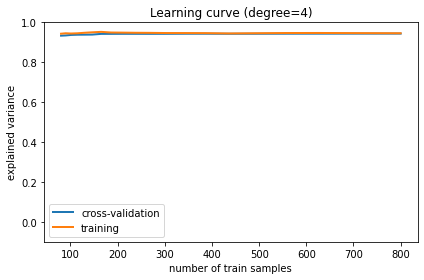

In [ ]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(PolynomialFeatures(degree=8), LinearRegression())

from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(model,xf[:, np.newaxis],yf,train_sizes=np.logspace(-1, 0, 20))

    # Plot the mean train error and validation error across folds
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, validation_scores.mean(axis=1),lw=2, label='cross-validation')
plt.plot(train_sizes, train_scores.mean(axis=1),lw=2, label='training')
plt.ylim(ymin=-.1, ymax=1)
plt.legend(loc='best')
plt.xlabel('number of train samples')
plt.ylabel('explained variance')
plt.title('Learning curve (degree=%i)' % d)
plt.tight_layout()


plt.show()

In [ ]:
#train_err=np.zeros((1,len(list)))
#valid_err=np.zeros((1,len(list)))

train_err=sum(np.square(lin_reg_2.predict(poly_reg.fit_transform(trainset[:,0]))-y)) /len(trainset)
#valid_err=sum(np.square(sp.jv(0,validset[:,0])-validset[:,1]))/len(validset)   #neyle karsılastorcaksın duzgun bak 
#plt.plot(x,train_err,x,valid_err)
print(train_err,valid_err)


In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=8, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))
degree = np.arange(0, 21)

train_score, val_score = validation_curve(PolynomialRegression(), X, y,'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(StandardScaler(),PolynomialFeatures(8))
#
# Get Training and test scores using validation curve method
# Pay attention to the parameter values range set as param_range
#
param_range = list
train_scores, test_scores = validation_curve(estimator=pipeline,X=trainset[:,0],y=trainset[:,1],cv=10,param_name='logisticregression__C', param_range=param_range)